# **Decision Trees and Random Forest on Iris dataset**

> Indented block



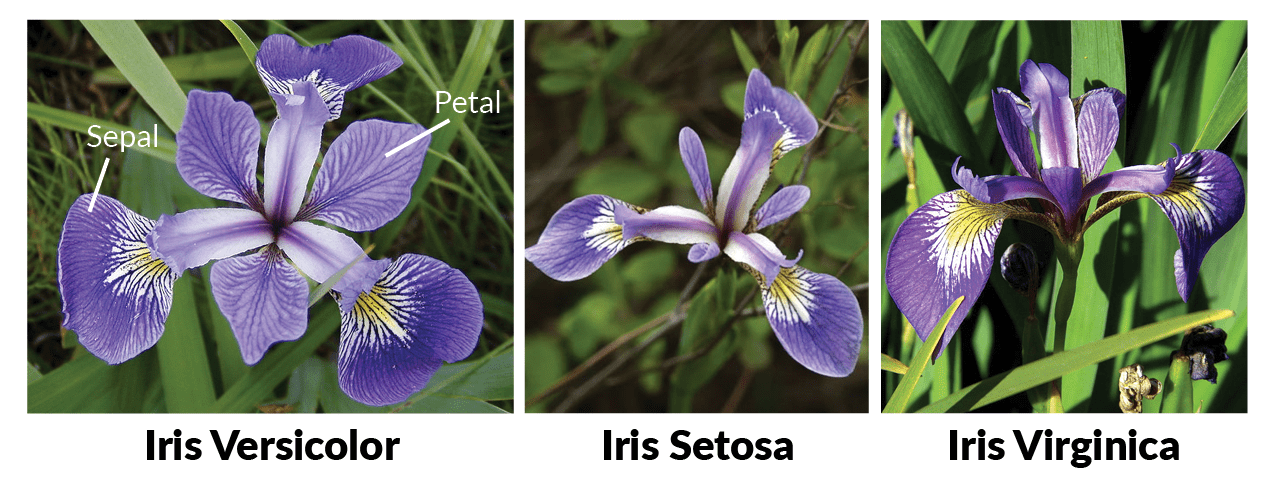

## **Importing necessary libraries**

In [1]:
#Data Manipulation
import pandas as pd

#Plotting
import seaborn as sns

#Importing Dataset
from sklearn import datasets

#ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Finding accuracy score
from sklearn.metrics import accuracy_score

#Split the data
from sklearn.model_selection import train_test_split

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

## **Data Preprocessing**

In [2]:
#Read the data and display the first five elements
url='https://drive.google.com/file/d/1pLnsz3HbODzDw5gRwkDcQ-Ad1G8E76EY/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#The last 5 elements of the dataset
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df=df.drop(columns=['Id'])

In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Statistical Description of the Dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Number of rows and columns in the dataset
df.shape

(150, 5)

In [8]:
#Number of null values per column
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Columns of the dataset
df.columns 

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
# iris = datasets.load_iris()

In [ ]:
# print("Iris data set Description :: ", iris['DESCR'])
# df = pd.DataFrame(data = iris.data)
# df.head()

## **Data Visualization**

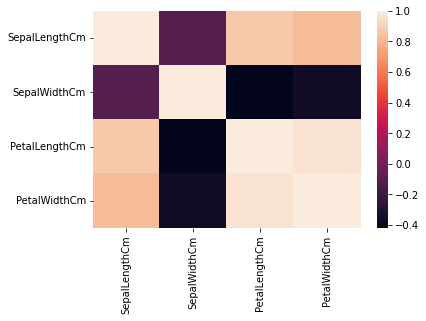

In [11]:
sns.heatmap(df.corr())

## **Splitting the data into Train and Test**

In [12]:
X = df.drop(columns=['Species'])
y = df['Species']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## **Decision Trees**

In [14]:
# build decision tree classifier, keep it blank to use the default parameters
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Generating predictions on the test set
y_pred = model.predict(X_test)

# Accuracy Score
acc= accuracy_score(y_test,y_pred)
print("The accuracy of Decision Tree Classifier is",round(acc,2)*100,"%")

The accuracy of Decision Tree Classifier is 97.0 %


**Visualizing Decision Trees**

In [16]:
# import import library for visualizing trees in a Decision Tree
from sklearn.tree import export_graphviz

# import generic libraries for displaying trees and saving them as images
from six import StringIO  
from IPython.display import Image  
import pydotplus

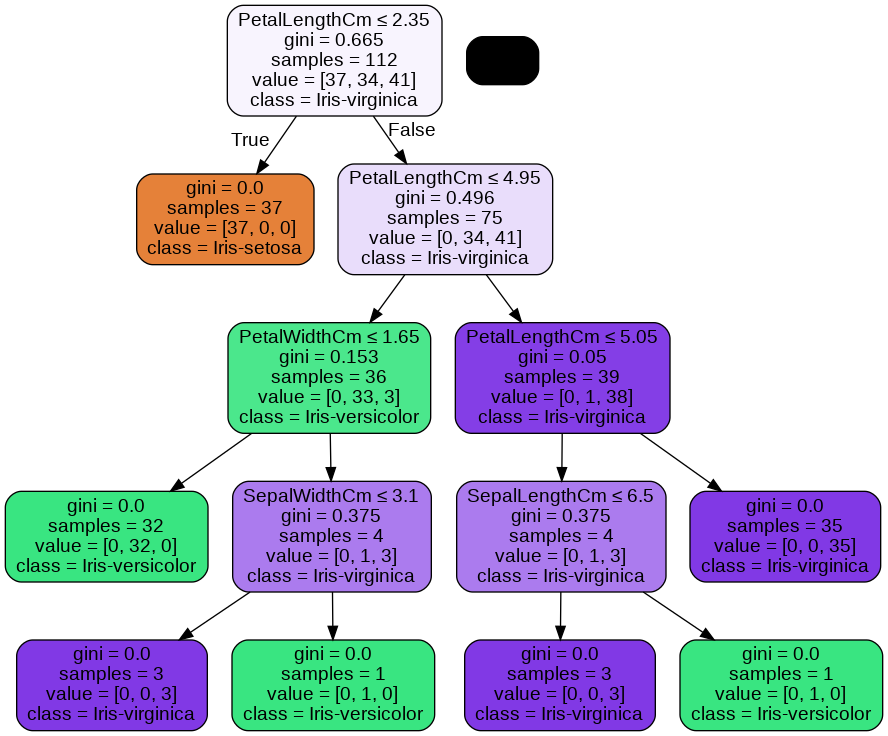

In [17]:
dot_data = StringIO()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
Image(graph.create_png())

## **Random Forest**

In [18]:
# build random forest classifier, select the number of trees by setting n_estimators = 100

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Make Predictions
y_pred = model.predict(X_test) 

# Accuracy Score
acc= accuracy_score(y_test,y_pred)
print("The accuracy of Random Forest Classifier is",round(acc,2)*100,"%")

The accuracy of Random Forest Classifier is 97.0 %


**Visualizing Random Forest**

In [20]:
# import library for visualizing individual trees (estimators) in Random Forest
from sklearn import tree

# import library for general plotting
import matplotlib.pyplot as plt

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 4.95\ngini = 0.657\nsamples = 72\nvalue = [35, 31, 46]\nclass = Iris-setosa'),
 Text(0.2, 0.75, 'PetalWidthCm <= 0.8\ngini = 0.512\nsamples = 45\nvalue = [35, 30, 1]\nclass = Iris-setosa'),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 23\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(0.3, 0.5833333333333334, 'SepalWidthCm <= 2.75\ngini = 0.062\nsamples = 22\nvalue = [0, 30, 1]\nclass = Iris-setosa'),
 Text(0.2, 0.4166666666666667, 'PetalLengthCm <= 4.7\ngini = 0.18\nsamples = 9\nvalue = [0, 9, 1]\nclass = Iris-setosa'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 8, 0]\nclass = Iris-setosa'),
 Text(0.3, 0.25, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-setosa'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-setosa'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(0.4, 0.41666666

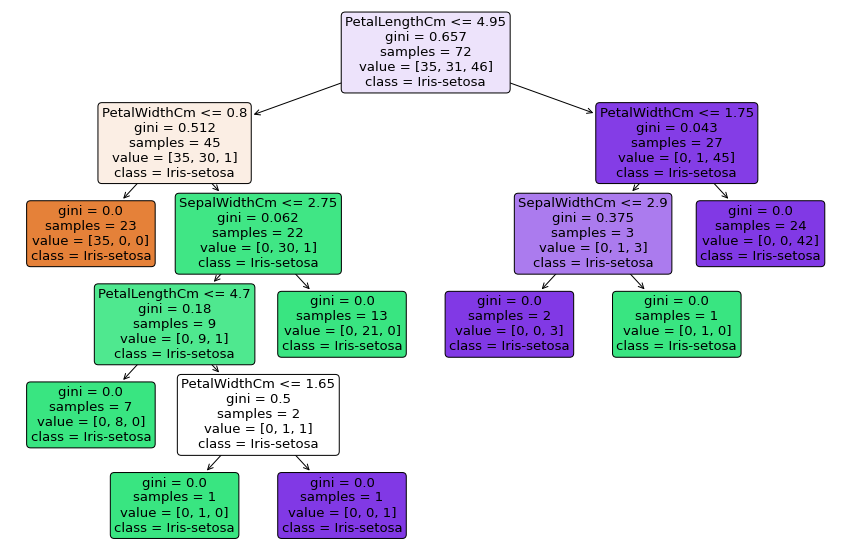

In [21]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = df['Species']

# visualize the first tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[0], #0 for second tree
          feature_names=features,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)
# fig.savefig('rf_5trees.png')

[Text(0.4, 0.9166666666666666, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 74\nvalue = [38, 37, 37]\nclass = Iris-setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 26\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.75, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 48\nvalue = [0, 37, 37]\nclass = Iris-setosa'),
 Text(0.2, 0.5833333333333334, 'PetalWidthCm <= 1.45\ngini = 0.114\nsamples = 19\nvalue = [0, 31, 2]\nclass = Iris-setosa'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 25, 0]\nclass = Iris-setosa'),
 Text(0.3, 0.4166666666666667, 'PetalLengthCm <= 5.0\ngini = 0.375\nsamples = 7\nvalue = [0, 6, 2]\nclass = Iris-setosa'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 6, 0]\nclass = Iris-setosa'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-setosa'),
 Text(0.8, 0.5833333333333334, 'PetalLengthCm <= 5.05\ngini = 0.25\nsamples = 29\nvalue = [0, 6, 35]\nclass = Iris-setosa'),
 Text(0.7, 0.4166666666666667, 'S

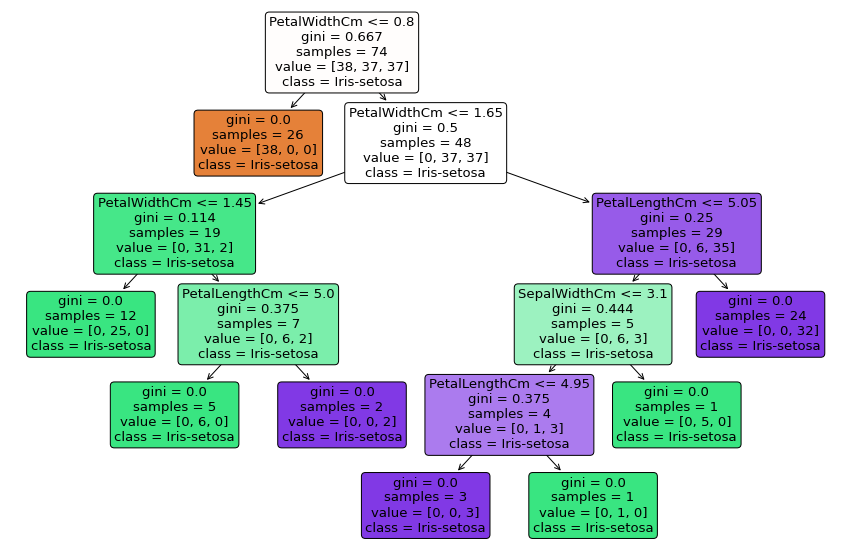

In [22]:
# visualize the second tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[1], # 1 for second tree
          feature_names=features,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

# **Thank You!**